# This model is for testing the model deployed in keras-tensorflow-model-deployment notebook

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from pylab import rcParams

%matplotlib inline
try:
    from PIL import Image
except ImportError:
    import Image

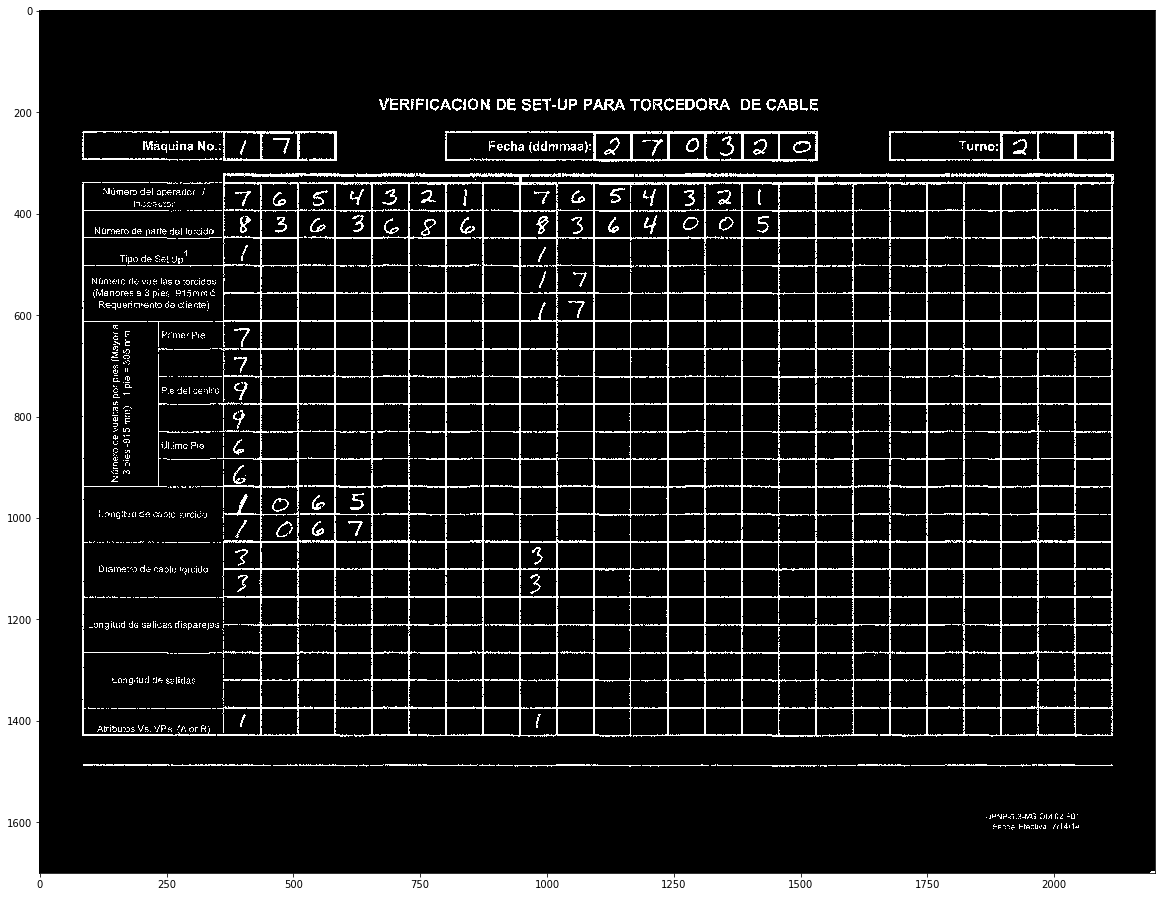

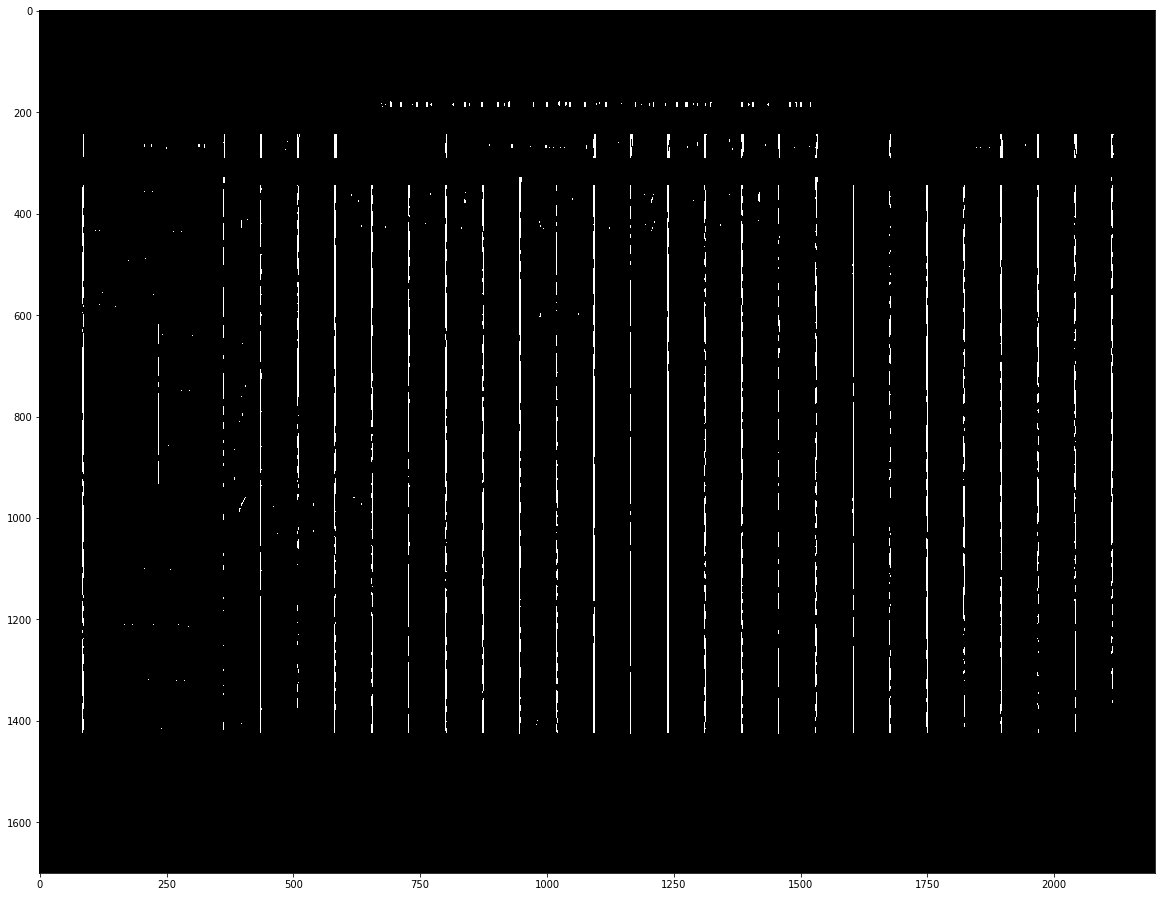

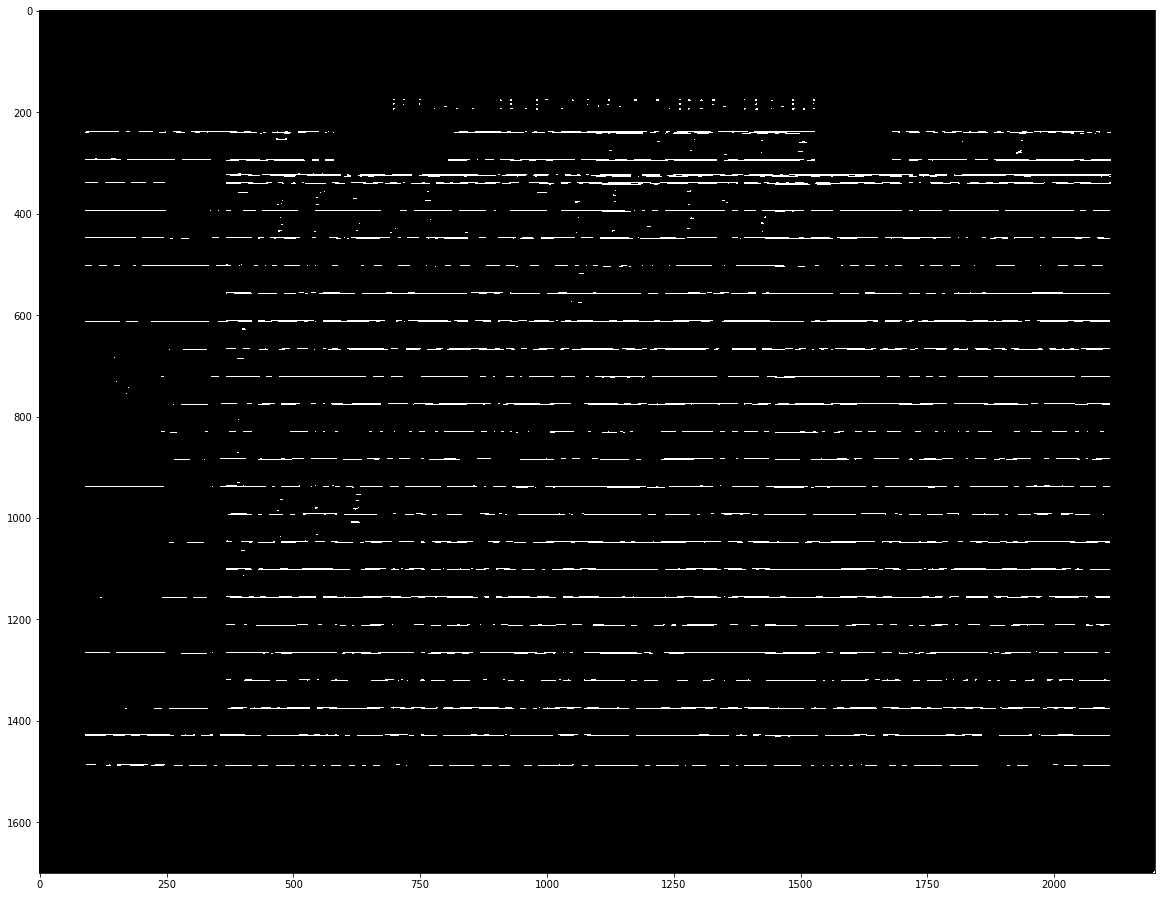

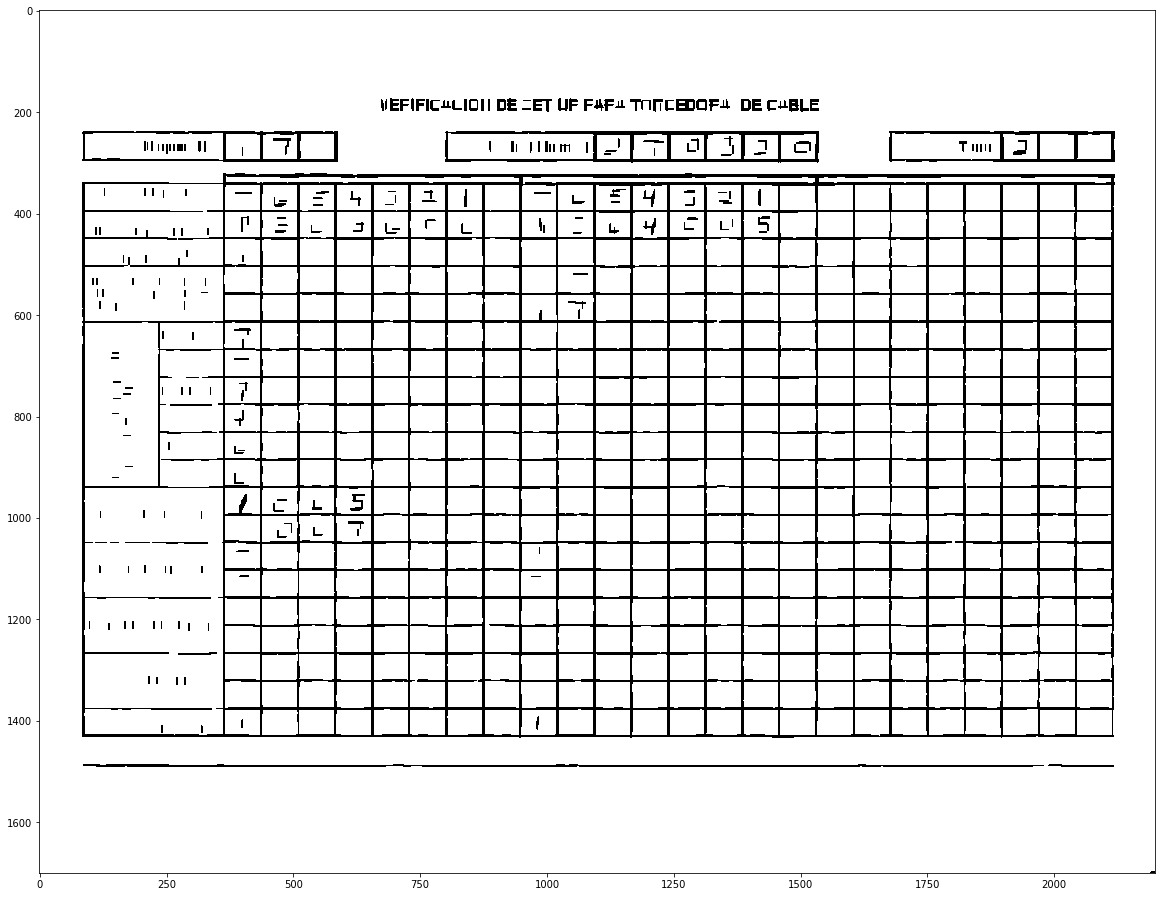

2200
21
21
21
9
21
21
20
22
22
22
22
41
22
22
22
20
20
41
20
7
8
8
8
20
20
22
23
21
7
8
23
20
20
22
22
18
21
22
21
12
13
9
10
6
8
9
5
7
19
447
738
506
214
288
271
67
67
67
68
67
67
67
67
66
67
66
66
19
38
19
6
21
44
30
18
7
6
7
7
6
6
30
8
7
6
6
5
21
5
6
6
7
22
5
7
7
7
6
7
5
5
5
27
6
7
5
5
5
5
25
26
17
23
2038
578
577
576
271
271
69
68
69
68
68
68
69
68
70
68
67
68
68
69
68
68
68
69
68
68
68
69
68
70
5
5
5
33
5
8
27
8
21
24
5
18
6
23
27
36
35
20
29
5
22
21
26
32
28
17
20
19
21
71
68
68
68
67
70
68
68
69
68
71
69
68
69
70
68
69
70
68
68
68
69
68
68
26
18
25
17
18
27
7
5
24
20
23
24
26
23
23
20
23
5
6
6
5
5
5
5
18
23
19
19
69
68
69
69
68
68
68
68
68
67
68
71
68
69
68
68
68
69
71
69
68
68
69
68
5
6
5
5
5
68
70
68
68
68
141
68
68
69
68
69
69
68
68
68
69
69
68
68
70
69
68
71
32
5
5
5
5
6
5
6
5
5
5
17
68
69
69
69
69
68
69
68
68
69
69
68
67
71
69
69
69
68
68
68
69
70
69
69
37
5
6
5
6
69
70
68
68
68
70
68
123
146
69
69
68
69
71
67
71
69
68
69
69
68
68
71
70
68
34
6
5
68
68
69
69
70
69
69
70
68


IndexError: list index out of range

In [53]:
!rm -rf saved-images/
!mkdir saved-images

crop_factor = .1

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from pylab import rcParams

%matplotlib inline
try:
    from PIL import Image
except ImportError:
    import Image
# import pytesseract

#read your file
file=r'3.png'
file=r'img_from_pdf/3-100.png'
file='img_from_pdf/2-103.png'
file=r'kevin_test.png'
file = 'kevinol_demo7-1.png'
# file=r'image_form.png'

img = cv2.imread(file,0)
img.shape

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('cv_inverted.png',img_bin)
#Plotting the image to see the output
rcParams['figure.figsize'] = 20, 20

plotting = plt.imshow(img_bin,cmap='gray')
plt.show()


############################################################################################################
#countcol(width) of kernel as 100th of total width
# # kernel_len = np.array(img).shape[1]//100
# kernel_len = np.array(img).shape[1]//100

# # Defining a vertical kernel to detect all vertical lines of image 
# ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# # Defining a horizontal kernel to detect all horizontal lines of image
# hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# # A kernel of 2x2
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))


# kernel_len = np.array(img).shape[1]//100
kernel_len = np.array(img).shape[1]//400

# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

############################################################################################################
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

plotting = plt.imshow(img_vh,cmap='gray')
plt.show()

#Plotting the generated image
# plotting = plt.imshow(bitnot,cmap='gray')
# plt.show()

# Detect contours for following box detection
# contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

_, contours, _= cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
#     if (w<1000 and h<500):
    print(w)
########################################################################
#####################   updated needed     #############################
########################################################################
#     if (w<75 and h<55 and w/h< 2 and w/h> 1):
    if (w < 400 and w > 100 and w/h< 2 and w/h> 1):
        print(w)
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
########################################################################
########################################################################
########################################################################        
# plotting = plt.imshow(image,cmap='gray')
# plt.show()

#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
# print(column)
# print(row)

#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

#Retrieving the center of each column

center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

center=np.array(center)
center.sort()
# print(center)
#Regarding the distance to the columns center, the boxes are arranged in respective order

finalboxes = []
for i in range(len(row)): #000000000000    range(len(row))   00000000000000000000000000000000000000000000000000000000000000000000000000
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)


#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
pic = 0
meanvals = []
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dim = (64, 64)
                resizing = cv2.resize(resizing, dim, interpolation = cv2.INTER_AREA)
                s0 = resizing.shape[0]
                s1 = resizing.shape[1]
                resizing = resizing[int(s0*crop_factor):int(s0*(1-crop_factor)), int(s1*crop_factor):int(s1*(1-crop_factor))]
#                 if resizing.mean() < 253:
#                     cv2.imwrite('saved-images/'+str(pic)+".png",resizing)
#                     print(resizing.mean())
#                     meanvals.append(resizing.mean())
#                     pic +=1   
                out = '1'
#                 else:
#                     out = ''
#                 resizing = resizing[y:y+5, x:x+5]

#                 dilation = cv2.dilate(resizing, kernel,iterations=1)
#                 erosion = cv2.erode(dilation, kernel,iterations=2)
             
                if(len(out)==0):
                    out = ' '
                inner = inner +" "+ out
            outer.append(inner)

#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol)) #0000000000  len(row)   0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
print(dataframe)
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file
data.to_excel("output.xlsx")

In [49]:
endpoint_name = 'sagemaker-tensorflow-2020-03-29-18-35-12-435'

file = '5-100.png'

crop_factor = .1

import json
import boto3
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from pylab import rcParams

client = boto3.client('runtime.sagemaker')


%matplotlib inline
try:
    from PIL import Image
except ImportError:
    import Image
# import pytesseract

# #read your file
# file=r'3.png'
# file=r'img_from_pdf/3-100.png'
# file='img_from_pdf/2-103.png'
# file=r'kevin_test.png'
# file = '0-0.png'
# # file=r'image_form.png'

img = cv2.imread(file,0)
img.shape

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin


############################################################################################################
#countcol(width) of kernel as 100th of total width
# # kernel_len = np.array(img).shape[1]//100
# kernel_len = np.array(img).shape[1]//100

# # Defining a vertical kernel to detect all vertical lines of image 
# ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# # Defining a horizontal kernel to detect all horizontal lines of image
# hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# # A kernel of 2x2
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))


# kernel_len = np.array(img).shape[1]//100
kernel_len = np.array(img).shape[1]//400

# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

############################################################################################################
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)


#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)


# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)


#Plotting the generated image
# plotting = plt.imshow(bitnot,cmap='gray')
# plt.show()

# Detect contours for following box detection
# contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

_, contours, _= cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
#     if (w<1000 and h<500):
#     print(w)
########################################################################
#####################   updated needed     #############################
########################################################################
#     if (w<75 and h<55 and w/h< 2 and w/h> 1):
    if (w < 400 and w > 100 and w/h< 2 and w/h> 1):
#         print(w)
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
########################################################################
########################################################################
########################################################################        
# plotting = plt.imshow(image,cmap='gray')
# plt.show()

#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
# print(column)
# print(row)

#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

#Retrieving the center of each column

center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

center=np.array(center)
center.sort()
# print(center)
#Regarding the distance to the columns center, the boxes are arranged in respective order

finalboxes = []
for i in range(len(row)): #000000000000    range(len(row))   00000000000000000000000000000000000000000000000000000000000000000000000000
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)


#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
pic = 0
meanvals = []
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dim = (64, 64)
                resizing = cv2.resize(resizing, dim, interpolation = cv2.INTER_AREA)
                s0 = resizing.shape[0]
                s1 = resizing.shape[1]
                im_gray = resizing[int(s0*crop_factor):int(s0*(1-crop_factor)), int(s1*crop_factor):int(s1*(1-crop_factor))]

                im_gray = im_gray/(255*255)
                dim = (28, 28)
                im_gray = cv2.resize(im_gray, dim, interpolation = cv2.INTER_AREA)

                im_gray = im_gray.astype('float32')
     
                #################
                im_graylist = im_gray.reshape(1, 784).tolist()  
                pred = client.invoke_endpoint(EndpointName=endpoint_name, Body=json.dumps(im_graylist))

                pred = json.loads(pred['Body'].read().decode("utf-8"))
                pred = np.array(pred['outputs']['score']['floatVal'])                
                ###################

                out = pred.argmax()
                if out ==10:
                    out = ''
                inner = inner +" "+ str(out)
            outer.append(inner)
        
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file

data.to_excel(file.split('/')[-1].split('.')[0]+'.xlsx')

    0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  20  \
0        5   1                              ...   5   5                       
1    5   5   5   5   5   5   5   5   5   5  ...   5   5   5   5   5   5   5   
2    5   5   5   5   5   5   5   5   5   5  ...   5   5   5   5   5   5   5   
3    5   5   5   5   5   5   5   5   5   5  ...   5   5   5   5   5   5   5   
4    5   5   5   5   5   5   5   5   5   5  ...   5   5   5   5   5   5   5   
5    5   5   5   5   5   5   5   5   5   5  ...   5   5   5   5   5   5   5   
6                                           ...                               
7                                           ...                               
8                                           ...                               
9                                           ...                               
10                                          ...                               
11                                          ...     

In [22]:
file.split('/')[-1].split('.')[0]+'.xlsx'

'0-0.xlsx'